# Perceptron from scikit-learn

Score on train data:  0.9825
Score on test data:  0.98
Score on train data:  0.9825
Score on test data:  0.98


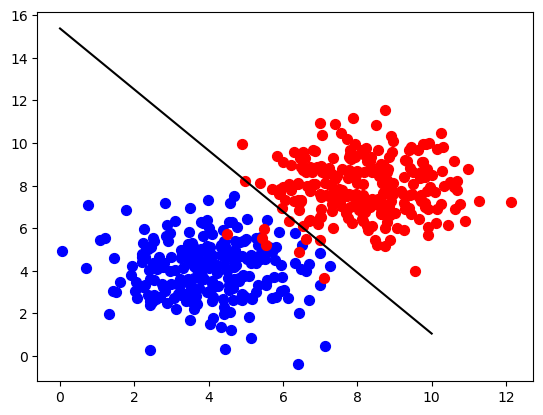

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron   
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np 

#genero i dati
data, labels = make_blobs(n_samples=500,centers=[[4,4],[8,8]], cluster_std=1.3)

#splitto il dataset in training data e test data
train_data, test_data, train_labels, test_labels = train_test_split(data,labels,test_size=0.2)

#lancio il Perceptron sul training data
p = Perceptron()
p.fit(train_data, train_labels)

#---- Due modi per calcolare lo score del Perceptron:
#1) prima predict sui dati (di training e test) e poi funzione accuracy_score di sklearn.metrics
predictions_train = p.predict(train_data)
predictions_test = p.predict(test_data)
train_score = accuracy_score(predictions_train, train_labels)
print("Score on train data: ", train_score)
test_score = accuracy_score(predictions_test, test_labels)
print("Score on test data: ", test_score)

#2) uso direttamente la funzione score di Perceptron 
print("Score on train data: ",p.score(train_data, train_labels))
print("Score on test data: ",p.score(test_data, test_labels))

#---- Recupero i parametri del modello
bias_term = p.intercept_
w_1 = p.coef_[0][0] #è una matrice per poter lavorare anche con la multiclass classification
w_2 = p.coef_[0][1] #se binary classification abbiamo una sola riga 

#----- 
plt.scatter(data[labels==0][:, 0], data[labels==0][:, 1], s=50, c='blue', label='0');
plt.scatter(data[labels==1][:, 0], data[labels==1][:, 1], s=50, c='red', label='1');

ascisse = np.linspace(0, 10, 2000) #si dovrebbe considerare le minime/massime ascisse/ordinate generate in data
ordinate = [(-w_1*x - bias_term)/w_2 for x in ascisse]
plt.plot(ascisse, ordinate, linestyle='solid', color='black')